# Students and Alcohol Consumption

### Context
[Kaggle’s Student Alcohol Consumption survey](https://www.kaggle.com/uciml/student-alcohol-consumption#student-por.csv) was conducted among students at Gabriel Pereira and Mousinho da Silveira secondary school in Porto, Portugal. Students in math and Portuguese language courses were selected to participate in the data collection. The survery contains various social, gender, and study information about students in regards to predicting their final grade.

Since this dataset consists of two parts, math and Portuguese language courses, we will merge together the files and examine it as one set. There are 382 students that belong to both datasets so we will join the files without overlapping data points. We will also assume that this dataset is a representative sample of the entire student population among the schools and each variable is independent of each other. 


In [1]:
# Libraries

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline


In [2]:
# Load and merge math and Portuguese language course files 

d1 = pd.read_csv('student-mat.csv')
d2 = pd.read_csv("student-por.csv")

data = pd.merge(d1, d2, how='outer', on=["school","sex","age","address","famsize",
                                         "Pstatus","Medu","Fedu","Mjob","Fjob",
                                         "reason","nursery","internet","guardian",
                                         "traveltime","studytime","famsup","activities",
                                         "higher","romantic","famrel","freetime",
                                         "goout","Dalc","Walc","health","schoolsup"])


In [3]:
# Check what type of data types we have

data.dtypes

school         object
sex            object
age             int64
address        object
famsize        object
Pstatus        object
Medu            int64
Fedu            int64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime      int64
studytime       int64
failures_x    float64
schoolsup      object
famsup         object
paid_x         object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel          int64
freetime        int64
goout           int64
Dalc            int64
Walc            int64
health          int64
absences_x    float64
G1_x          float64
G2_x          float64
G3_x          float64
failures_y    float64
paid_y         object
absences_y    float64
G1_y          float64
G2_y          float64
G3_y          float64
dtype: object

In [4]:
# Build a new dataframe of integer columns to convert to categorical variables

int_data = data.select_dtypes(include=['int']).copy()
int_data.head()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health
0,18,4,4,2,2,4,3,4,1,1,3
1,17,1,1,1,2,5,3,3,1,1,3
2,15,1,1,1,2,4,3,2,2,3,3
3,15,4,2,1,3,3,2,2,1,1,5
4,16,3,3,1,2,4,3,2,1,2,5


In [5]:
# Let's check for null values first and it doesn't look like there are

int_data[int_data.isnull().any(axis=1)]

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health


In [12]:
# Convert selected features from to categorical type

data.columns = ['school','sex','age','address','famsize','Pstatus',
                'Medu','Fedu','Mjob','Fjob','reason','guardian',
                'traveltime','studytime','failures_x','schoolsup',
                'famsup','paid_x','activities','nursery','higher',
                'internet','romantic','famrel','freetime','goout',
                'Dalc','Walc','health','absences_x','G1_x','G2_x',
                'G3_x','failures_y','paid_y','absences_y',
               'G1_y','G2_y','G3_y']

columns_category = ['school','sex','traveltime','studytime','Dalc',
                'Walc','health']
data[columns_category] = data[columns_category].astype('str')
data[columns_category] = data[columns_category].astype('category')

In [13]:
# Convert column values to text

cleanup_int = {'traveltime': {'1':'<15 min.','2':'15 to 30 min.',
                             '3':'30 min. to 1 hour','4':'>1 hour'},
              'studytime': {'1':'<2 hours','2':'2 to 5 hours',
                          '3':'5 to 10 hours','4':'>10 hours'},
              'Dalc': {'1':'very low','2':'low','3':'moderate',
                      '4':'high','5':'very high'},
              'Walc': {'1':'very low','2':'low','3':'moderate',
                      '4':'high','5':'very high'},
              'health': {'1':'very bad','2':'bad','3':'fair',
                      '4':'good','5':'very good'}}

data.replace(cleanup_int,inplace=True)


### Sample of Dataset

In [14]:
display(data.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,absences_x,G1_x,G2_x,G3_x,failures_y,paid_y,absences_y,G1_y,G2_y,G3_y
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,6.0,5.0,6.0,6.0,0.0,no,4.0,0.0,11.0,11.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,4.0,5.0,5.0,6.0,0.0,no,2.0,9.0,11.0,11.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,10.0,7.0,8.0,10.0,0.0,no,6.0,12.0,13.0,12.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2.0,15.0,14.0,15.0,0.0,no,0.0,14.0,14.0,14.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,4.0,6.0,10.0,10.0,0.0,no,0.0,11.0,13.0,13.0


There are 39 attributes to the dataset. A few features that will be explore later include: <br>

__school__: student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)<br>
__sex__ : Student's sex (binary: 'F' - female or 'M' - male)<br>
__age__ : Student's age (numeric: from 15 to 22)<br>
__address__ : Student's home address type (binary: 'U' - urban or 'R' - rural)<br>
__traveltime__ : home to school travel time (category: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)<br>
__studytime__ : weekly study time (category: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)<br>
__Dalc__ : Weekday alcohol consumption (category: from 1 - very low to 5 - very high)<br>
__Walc__ : Weekend alcohol consumption (category: from 1 - very low to 5 - very high)<br>
__health__ : current health status (category: from 1 - very bad to 5 - very good)<br>

### Exploring the schools 

In [15]:
# Gabriel Pereira Secondary School Statistics

GP_stud = data[(data.school == 'GP')]
GP_trim = GP_stud.loc[:,["school","sex","age", "address","traveltime", 
                         "studytime","Dalc","Walc","health"]]

GP_des = GP_stud.describe(include='category')

# Mousinho da Silveira Secondary School Statistics

MS_stud = data[(data.school == 'MS')]
MS_trim = MS_stud.loc[:,["school","sex","age", "address","traveltime", 
                         "studytime","Dalc","Walc","health"]]

MS_des = MS_stud.describe(include='category')

pd.concat([GP_des,MS_des], axis=1,
         keys=['GP Statistics',
               'MS Statistics'])

GP Statistics                                                    \
              school  sex traveltime     studytime      Dalc      Walc   
count            441  441        441           441       441       441   
unique             1    2          4             4         5         5   
top               GP    F   <15 min.  2 to 5 hours  very low  very low   
freq             441  247        295           215       315       176   

                  MS Statistics                                              \
           health        school  sex     traveltime     studytime      Dalc   
count         441           233  233            233           233       233   
unique          5             1    2              4             4         5   
top     very good            MS    F  15 to 30 min.  2 to 5 hours  very low   
freq          170           233  149            107           103       154   

                             
            Walc     health  
count        233        233  
unique         5          5  
top     very low  very good  
freq          81         85

In [16]:
# Code for school description 

# Student population 
total_stud = data.sex.count()
GP_stud_pre = str(round((GP_stud.sex.count()/
                         data.sex.count())*100))+'%'
MS_stud_pre = str(round((MS_stud.sex.count()/
                         data.sex.count())*100))+'%'

# Gender 
GP_female = GP_stud[(data.sex == 'F')]
GP_stud_fem = str(round((GP_female.sex.count()/
                         GP_stud.sex.count())*100))+'%'
MS_female = MS_stud[(data.sex == 'F')]
MS_stud_fem = str(round((MS_female.sex.count()/
                         MS_stud.sex.count())*100))+'%'


/Users/tsawaengsri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/Users/tsawaengsri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


This survey consists of {total_stud} students, 65% of students from Gabriel Pereira Secondary School and 35% of students from Mousinho da Silveira Secondary School. Both the schools have a higher amount of female than male students, 56% females at Gabriel Pereira and 64% females at Mousinho da Silveira. Students attending Mousinho da Silveira Secondary School appear to have a longer commute to school, averaging around 15 minutes while students at Gabriel Pereira travel less than 15 minutes. Students at both schools average in about 2 to 5 hours per week of study time. Students from both schools identified as being very healthy.

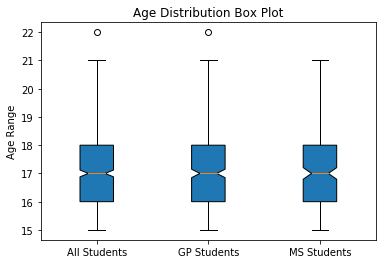

In [17]:
# Plot age distribution 

all= data.age
GP= GP_stud.age
MS=MS_stud.age

box_plot_data=[all,GP,MS]
plt.title('Age Distribution Box Plot')
plt.ylabel('Age Range')
plt.boxplot(box_plot_data,notch='True',patch_artist=True,
            labels=['All Students','GP Students','MS Students'])
plt.show()

According to the box plot, the population age ranges from 15 to 22 years old. The median age for both schools is approximately 17 years old. There does appear to be one outlier, a 22 years old student at GP. This would skew the distribution towards the older age range. 

### Let's take a look at characteristics of alcohol consumption during weekdays and weekends



In [18]:
# Create weekday and weekend alcohol consumption dataframes 

weekday = data.Dalc.describe() 
weekend = data.Walc.describe()

pd.concat([weekday,weekend], axis=1,
         keys=['Weekday Statistics',
               'Weekend Statistics'])

,Weekday Statistics,Weekend Statistics
count,674,674
unique,5,5
top,very low,very low
freq,469,257


Text(0.5,1,'Alcohol Consumption on Weekdays')

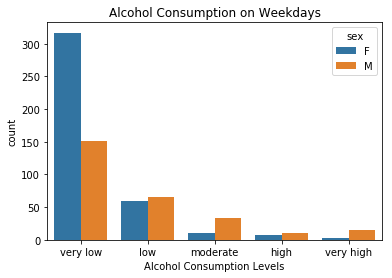

In [19]:
# Weekday Alcohol Consumption 

order = ('very low','low','moderate','high','very high')
ax1 = sns.countplot(data=data,x='Dalc',hue='sex',order=order)
ax1.set_xlabel('Alcohol Consumption Levels')
plt.title('Alcohol Consumption on Weekdays')

Text(0.5,1,'Alcohol Consumption on Weekends')

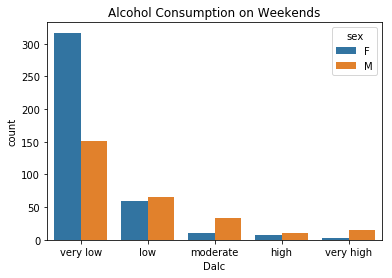

In [20]:
# Weekend Alcohol Consumption

order = ('very low','low','moderate','high','very high')
ax2 = sns.countplot(data=data,x='Dalc',hue='sex',order=order)
ax1.set_xlabel('Alcohol Consumption Levels')
plt.title('Alcohol Consumption on Weekends')

In [21]:
fig = plt.figure(figsize(10,4))
title = fig.suptitle('Student Alcohol Consumption on a Weekly Basis',
                    fontsize=14)
fig.subplot_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Weekdays')
ax1.set_xlabel('Alcohol Consumption')
ax1.set_ylabel('Number of Students')
sns.kdeplot(data['Dalc'], ax=ax1, shade=True, color='r')

ax1 = fig.add_subplot(1,2,2)
ax1.set_title('Weekends')
ax1.set_xlabel('Alcohol Consumption')
ax1.set_ylabel('Number of Students')
sns.kdeplot(data['Walc'], ax=ax1, shade=True, color='y')

NameError: name 'figsize' is not defined

As shown above, most students consume very low levels of alcohol throughout the week. There does appear to be an increase of alcohol consumption during weekends.  For example, the number of students who consume moderate to very high level of alcohol double from weekdays to weekends.

### Which age group has the highest alcohol consumption during weekdays or weekends?


In [22]:
# Create age groups
age15=data[(data.age==15)]
age16=data[(data.age==16)]
age17=data[(data.age==17)]
age18=data[(data.age==18)]
age19=data[(data.age==19)]
age20=data[(data.age==20)]
age21=data[(data.age==21)]
age22=data[(data.age==22)]

In [23]:
# Age Group Weekday 

all=data.Dalc.value_counts()
a15=age15.Dalc.value_counts()
a16=age16.Dalc.value_counts()
a17=age17.Dalc.value_counts()
a18=age18.Dalc.value_counts()
a19=age19.Dalc.value_counts()
a20=age20.Dalc.value_counts()
a21=age21.Dalc.value_counts()
a22=age22.Dalc.value_counts()

# need to fix index order 
# need title 

pd.concat([all,a15,a16,a17,a18,a19,a20,a21,a22], axis=1, 
         keys=["All Students","Age 15","Age 16","Age 17",
                "Age 18", "Age 19", "Age 20", "Age 21","Age 22"])

,All Students,Age 15,Age 16,Age 17,Age 18,Age 19,Age 20,Age 21,Age 22
high,18,1,3,3,6,4,1,0,0
low,125,22,34,36,26,5,2,0,0
moderate,45,7,8,15,8,6,0,1,0
very high,17,1,3,6,5,0,0,1,1
very low,469,82,131,120,100,30,5,1,0


In [25]:
# Age Group Weekend 
all=data.Walc.value_counts()
a15=age15.Walc.value_counts()
a16=age16.Walc.value_counts()
a17=age17.Walc.value_counts()
a18=age18.Walc.value_counts()
a19=age19.Walc.value_counts()
a20=age20.Walc.value_counts()
a21=age21.Walc.value_counts()
a22=age22.Walc.value_counts()

# need to fix index order 
# need title 

pd.concat([all,a15,a16,a17,a18,a19,a20,a21,a22], axis=1, 
         keys=["All Students","Age 15","Age 16","Age 17",
                "Age 18", "Age 19", "Age 20", "Age 21","Age 22"])

,All Students,Age 15,Age 16,Age 17,Age 18,Age 19,Age 20,Age 21,Age 22
high,91,12,26,22,24,5,2,0,0
low,155,20,43,48,34,8,1,1,0
moderate,125,20,26,40,25,12,1,1,0
very high,46,5,12,16,11,0,1,0,1
very low,257,56,72,54,51,20,3,1,0


# need to update
Based on the average of alcohol consumption during weekdays, age 22 has the highest consumption level with 5.0. However, the mean might not be the most accurate way to answering the question since there is only one student who is 22 years old.

If we disregard age group 22 as an outlier, age group 21 consumes the highest level of alcohol on weekdays with a mean level of 3.0. Meanwhile, students in age group 17 consume the most alcohol during weekends with an average consumption level of 2.4.


#### We will combine age groups to create 3 new groups and compare the consumption level 
New groups consists of the following:<br>
__mid teens__: ages 15 and 16<br>
__late teens__: ages 17 and 18<br>
__adult__: ages 19 to 22 

In [26]:
# Create new age groups

mid_teens = data[((data.age > 14) & (data.age < 17))]
late_teens = data[((data.age > 16) & (data.age < 19))]
adult = data[((data.age > 18) & (data.age < 23))]

In [27]:
mid_teens=mid_teens.Dalc.value_counts()
late_teens=late_teens.Dalc.value_counts()
adult=adult.Dalc.value_counts()


# need to fix index order 
# need title 
# convert NaN to 0 
pd.concat([all,mid_teens,late_teens,adult], axis=1, 
         keys=["All Students","Mid Teens","Late Teens","Adult"])

,All Students,Mid Teens,Late Teens,Adult
high,91,4,9,5
low,155,56,62,7
moderate,125,15,23,7
very high,46,4,11,2
very low,257,213,220,36


In [29]:
mid_teens=mid_teens.Walc.value_counts()
late_teens=late_teens.Walc.value_counts()
adult=adult.Walc.value_counts()


# need to fix index order 
# need title 
# convert NaN to 0 
pd.concat([all,mid_teens,late_teens,adult], axis=1, 
         keys=["All Students","Mid Teens","Late Teens","Adult"])

AttributeError: 'Series' object has no attribute 'Walc'

# Need to Update
Mid and late teens drinking patterns appears to undergo the most drastic change from very low to high alcohol consumption. Most of students in their mid and late teens are relatively light drinkers with a few exceptions. In contrast, the adult age group alcohol consumption level is more stagnant than other age groups. Majority of the adult group identified as light drinkers while the other half consumes a moderate to high amount of alcohol on a weekly basis.<br>

Base on the quantity of heavy drinkers, students in the late teens age group out number other groups. However, if we were to compare high and low levels of consumption within the age groups, the adult age group have proportionally higher amounts of heavy drinkers than the rest.


### Which gender consumes more alcohol weekly?

In [30]:
# Create geneders

female=data[data.sex=="F"]
male= data[data.sex=="M"]

ValueError: could not convert string to float: 'very low'

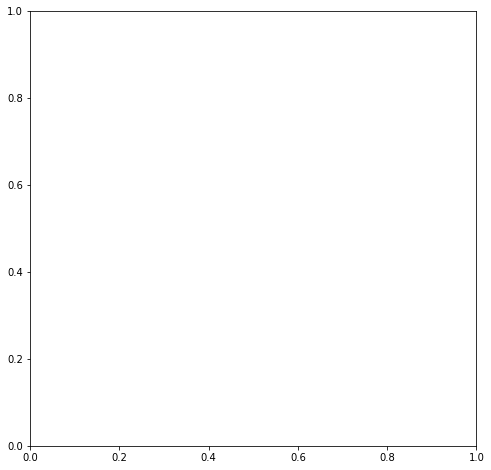

In [31]:
label = ['very low','low','moderate','high','very high']
index = np.arange(len(label))

plt.figure(figsize=(8,8))
plt.pie(female.Dalc, labels=label,
       startangle=90, autopct='%.1f %%')
plt.show()

In [32]:
female= list(map(lambda l: list(female.Talc).count(l),l))

colors='yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'orchid'

fig1, ax1 = plt.subplots()

#explsion
explode = (0.05,0.05,0.05,0.05,0.1)

ax1.pie(female, colors = colors, labels=labels, autopct='%1.1f%%', 
        startangle=90, pctdistance=0.85, explode=explode)
plt.title("Female Students Alcohol Consumption on a Weekly Basis")

# Draw a circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal') 
plt.tight_layout()
plt.show()


NameError: name 'l' is not defined

##### Female Students Alcohol Consumption on a Weekly Basis
__Very Low__: 69.6%<br>
__Low__: 21.8%<br>
__Moderate__: 6.6%<br>
__High__: 1.6%<br>
__Very High__: 0.4%<br>



In [33]:
male= list(map(lambda l: list(male.Talc).count(l),l))

colors='yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'orchid'

fig1, ax1 = plt.subplots()

#explsion
explode = (0.05,0.05,0.05,0.05,0.05)

ax1.pie(male, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)
plt.title("Male Students Alcohol Consumption on a Weekly Basis")

# Draw a circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal') 
plt.tight_layout()
plt.show()

NameError: name 'l' is not defined

##### Male Students Alcohol Consumption on a Weekly Basis
__Very Low__: 39.6%<br>
__Low__: 25.8%<br>
__Moderate__: 19.8%<br>
__High__: 7.1%<br>
__Very High__: 7.7%<br>

Base on the graphs above, female students generally consume lower amounts of alcohol than male students throughout the week. While 90% of females identified themselves as light drinkers, approximately 65% of male students have a low intake of alcohol on a weekly basis. 

### Do students in ubran areas consume more alcohol than those who live in rural areas?

In [34]:
urban=data[data.address=="U"]
rural= data[data.address=="R"]

In [35]:
urban_weekday=list(map(lambda l: list(urban.Talc).count(l),l))
rural_weekday=list(map(lambda l: list(rural.Talc).count(l),l))


n = 5
fig, ax = plt.subplots(figsize=(10,5))
i = np.arange(n)   
w = 0.4   

plot1= plt.bar(i, urban_weekday, w, color="blue", alpha=.5)
plot2= plt.bar(i+w, rural_weekday, w, color="green", alpha=.5 )

plt.xlabel('Alcohol Consumption')
plt.ylabel('Number of Student')
plt.title('Urban and Rural Alcohol Consumption on a Weekly Basis')
plt.xticks(i+w/2, labels)
plt.legend((plot1[0],plot2[0]),("Urban","Rural"))
plt.tight_layout()
plt.grid()
plt.show()

NameError: name 'l' is not defined

In [36]:
d2= {"Feature": ["All Students","Urban Students","Rural Students"],
    "Count": [data.shape[0],urban.shape[0],rural.shape[0]],
    "Average Weekday Alcohol Consumption": [data.Dalc.mean(),urban.Dalc.mean(),
                                            rural.Dalc.mean()],
    "Average Weekend Alcohol Consumption": [data.Walc.mean(),urban.Walc.mean(),
                                            rural.Walc.mean()],
    "Average Weekly Alcohol Consumption": [data.Talc.mean(),urban.Talc.mean(),
                                           rural.Talc.mean()]}

df2=pd.DataFrame(d2)

TypeError: Categorical cannot perform the operation mean

In [37]:
df2

NameError: name 'df2' is not defined

At a glance, a significant proportion of students in urban settings would associate themselves as light drinkers. A similar trend is true with students in rural areas as well. Based on the quantity of data points, there are more heavy drinkers in the urban than rural areas. If we were to reference the mean, both students in urban and rural areas consume moderate levels of alcohol on a weekly basis. However, it is apparent that students in rural settings consume a higher amount of alcohol on average than the total student population during weekdays and weekends. 

## Conclusion 

__Base on the analysis, we can conclude the following__:

Generally, students tend to consume higher levels of alcohol during weekends. There also appears to be a positive correlation between increased alcohol consumption and age groups. Students in older age groups consume more alcohol on average than younger students. Male students also consume more and higher levels of alcohol than female students throughout the week. The data also shows that on average, students residing in urban settings consume less alcohol than students in rural areas. 

__Limitations__

In terms of analyzing the data, I found that certain variable types were not appropriately assigned. For instance, weekday and weekend alcohol consumption variables were labeled as numeric values. This presented a challenge since the measurements were subjected to a numeric rating system instead of a concrete number of alcohol intake. Establishing a consumption scale based on a more solid measurement, such as the approximate volume of the alcohol container, would have reduced some ambiguity between the subtle differences of what constitutes as a light and moderate drinker. 

Another limitation occurred during the creation of sample data groups.  For example, in determining which age group consumed the most alcohol on a weekly basis, some of the sample groups were significantly small.  Age group 15 to 18 had at least 100 students in each group, while ages 20 and up had less than 10 data points.  I attempted to increase the sample sizes to more accurately represent the student population by reducing the age groups from 7 to 3. 

__Recommendations for further analysis__

With the current information given, I would like to explore how different attributes interact with each other and predict students final grade with certain characteristics. 

 